# Introduction
purpose of this notebok is to performe Data analysis of **Liar** Dataset, for Final year project

["Liar, Liar Pants on Fire": A New Benchmark Dataset for Fake News Detection](https://arxiv.org/abs/1705.00648)

Overview:

Automatic fake news detection is a challenging problem in deception detection, and it has tremendous real-world political and social impacts. However, statistical approaches to combating fake news has been dramatically limited by the lack of labeled benchmark datasets. In this paper, we present liar: a new, publicly available dataset for fake news detection. We collected a decade-long, 12.8K manually labeled short statements in various contexts from this http URL, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type. Empirically, we investigate automatic fake news detection based on surface-level linguistic patterns. We have designed a novel, hybrid convolutional neural network to integrate meta-data with text. We show that this hybrid approach can improve a text-only deep learning model.

# Mounting Notebook with Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Importing packages
**os:** to interact with the operating system.

**numpy :** for performing mathematical operations.

**matplotlib.pyplot:**  for creating plots and visualizations.

**seaborn:** It simplifies the process of creating common types of plotss.

**pandas** : provides data structures i.e Series (one-dimensional labeled array), DataFrame (two-dimensional labeled data structure) for data manipulation, cleaning, and analysis.

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Data Handling
This class for load and writing dataset.

**Attributes**

train_file: file path training data CSV file.

val_file: file path validation data CSV file.

test_file: file path test data CSV file.

**Methods:**

**load_csv_data(self, delimiter=','): ***Loads the data from the CSV files into separate pandas DataFrames for training, validation, and testing.

***save_csv_data(self, train_data, val_data, test_data, folder=None, delimiter=','):*** Saves the provided DataFrames (train_data, val_data, test_data) as CSV files. If folder is provided, the CSV files will be saved in the specified folder otherwise, they will be saved in the same location as the original files.

Note: dilimiter hear indicates if (,) file is csv if (/t) file is tsv

In [ ]:
class DataHandler:
    def __init__(self, train_file, val_file, test_file):
        self.train_file = train_file
        self.val_file = val_file
        self.test_file = test_file

    def load_csv_data(self, delimiter=','):
        self.train_data = pd.read_csv(self.train_file, delimiter=delimiter)
        self.val_data = pd.read_csv(self.val_file, delimiter=delimiter)
        self.test_data = pd.read_csv(self.test_file, delimiter=delimiter)
        return self.train_data, self.val_data, self.test_data



    def save_csv_data(self, train_data, val_data, test_data, folder=None, delimiter=','):
        if folder:
            train_path = os.path.join(folder, 'train.csv')
            val_path = os.path.join(folder, 'val.csv')
            test_path = os.path.join(folder, 'test.csv')
        else:
            train_path = self.train_file
            val_path = self.val_file
            test_path = self.test_file

        train_data.to_csv(train_path, index=False, sep=delimiter)
        val_data.to_csv(val_path, index=False, sep=delimiter)
        test_data.to_csv(test_path, index=False, sep=delimiter)




##Loading dataset

in this section dataset is being loaded and respective colums are added.

In [ ]:
base_path = '/content/drive/MyDrive'  # base directory where the "liar" folder is located
foldername= 'liar_dataset'
train_path = os.path.join(base_path, foldername, 'train.tsv')
val_path = os.path.join(base_path, foldername, 'valid.tsv')
test_path = os.path.join(base_path, foldername, 'test.tsv')



data_handler = DataHandler(train_path, val_path, test_path)
liar_df = data_handler.load_csv_data(delimiter='\t')

column_names = ['ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Job Title',
                'State', 'Party Affiliation', 'Barely True Counts',
                'False Counts', 'Half True Counts', 'Mostly True Counts',
                'Pants on Fire Counts', 'Context']
                # liar_df = (train_data,val_data, test_data)

for df in liar_df:
  df.columns = column_names
liar_df[0].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10239 non-null  object 
 1   Label                 10239 non-null  object 
 2   Statement             10239 non-null  object 
 3   Subject               10237 non-null  object 
 4   Speaker               10237 non-null  object 
 5   Job Title             7342 non-null   object 
 6   State                 8031 non-null   object 
 7   Party Affiliation     10237 non-null  object 
 8   Barely True Counts    10237 non-null  float64
 9   False Counts          10237 non-null  float64
 10  Half True Counts      10237 non-null  float64
 11  Mostly True Counts    10237 non-null  float64
 12  Pants on Fire Counts  10237 non-null  float64
 13  Context               10137 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [ ]:
df.sample(n=1)



,ID,Label,Statement,Subject,Speaker,Job Title,State,Party Affiliation,Barely True Counts,False Counts,Half True Counts,Mostly True Counts,Pants on Fire Counts,Context
359,6577.json,half-true,"Last month, 44 of the 50 states saw an increas...","economy,jobs,states",scott-walker,Milwaukee County Executive,Wisconsin,republican,26,41,32,40,11,a speech to the Republican National Convention...


#Visualization & Exploration of Content

##Label distribution

This datset has total of 6 labels, it is categorised into

barely-true

false
half-true
mostly-true
pants-fire
true

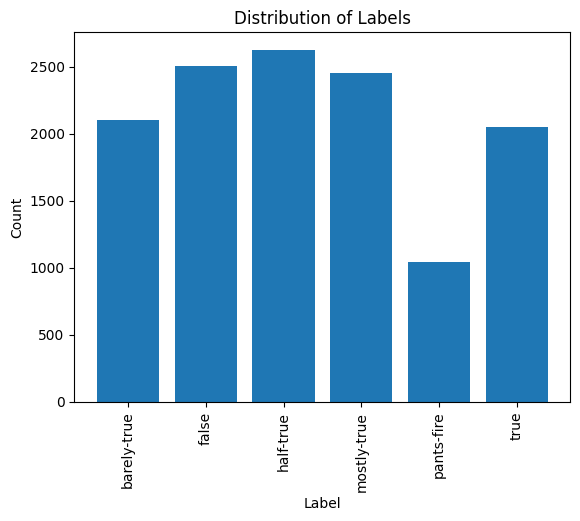

barely-true    2102
false          2506
half-true      2627
mostly-true    2454
pants-fire     1047
true           2052
Name: Label, dtype: int64


In [ ]:
# Concatenate label counts from all dataframes
label_counts = pd.concat([df['Label'].value_counts() for df in liar_df])

# Group and sum the label counts
label_counts = label_counts.groupby(level=0).sum()

# Plot a bar chart
plt.bar(label_counts.index, label_counts.values)

# Set labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()

print(label_counts)


##Distribution of Subjects:

subject here indicate different topics this dataset is compromised of

here in this seciton Top 10 most appearing subject are printed & ploted

There are total of **143 unique subjects**

Number of Unique Subjects: 144


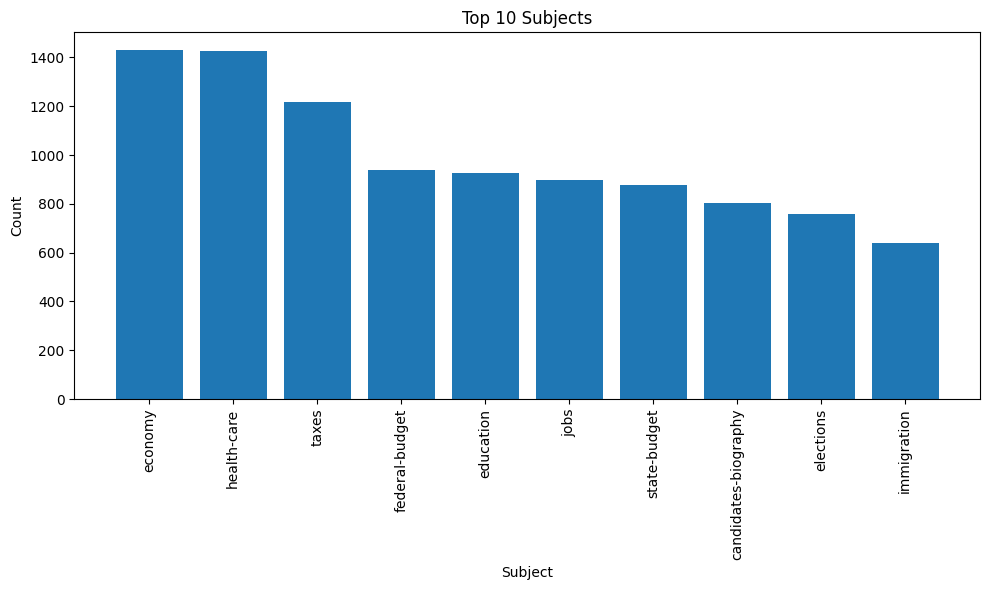

Top 10 Subjects:
economy                 1431
health-care             1426
taxes                   1218
federal-budget           937
education                926
jobs                     898
state-budget             879
candidates-biography     805
elections                757
immigration              641
Name: Subject, dtype: int64


In [ ]:
# Split subjects on commas and create separate rows
subject_counts = pd.concat([df['Subject'].str.split(',').explode().value_counts() for df in liar_df])

# Calculate the count for each unique subject
subject_counts = subject_counts.groupby(level=0).sum()

# Get the number of unique subjects
num_unique_subjects = len(subject_counts)

# Sort the subjects by count in descending order
subject_counts_sorted = subject_counts.sort_values(ascending=False)

# Select the top 10 most frequent subjects
top_10_subjects = subject_counts_sorted.head(10)

# Print the number of unique subjects
print("Number of Unique Subjects:", num_unique_subjects)

# Plot a bar chart for top 10 subjects
plt.figure(figsize=(10, 6))
plt.bar(top_10_subjects.index, top_10_subjects.values)
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Top 10 Subjects')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the top 10 subjects
print("Top 10 Subjects:")
print(top_10_subjects)


##Distribution of Word Lengths:

There are total of 12k statements

In this section the length of words in each statement is calculated and stored in the word_lengths list. The maximum word length is determined to identify the longest word in all statements, and the mean word which is length is calculated to understand the average word length across the dataset.

Number of statements: 12788
Max length of words in the statements: 467
Mean length of words in the statements: 18.042305286205817


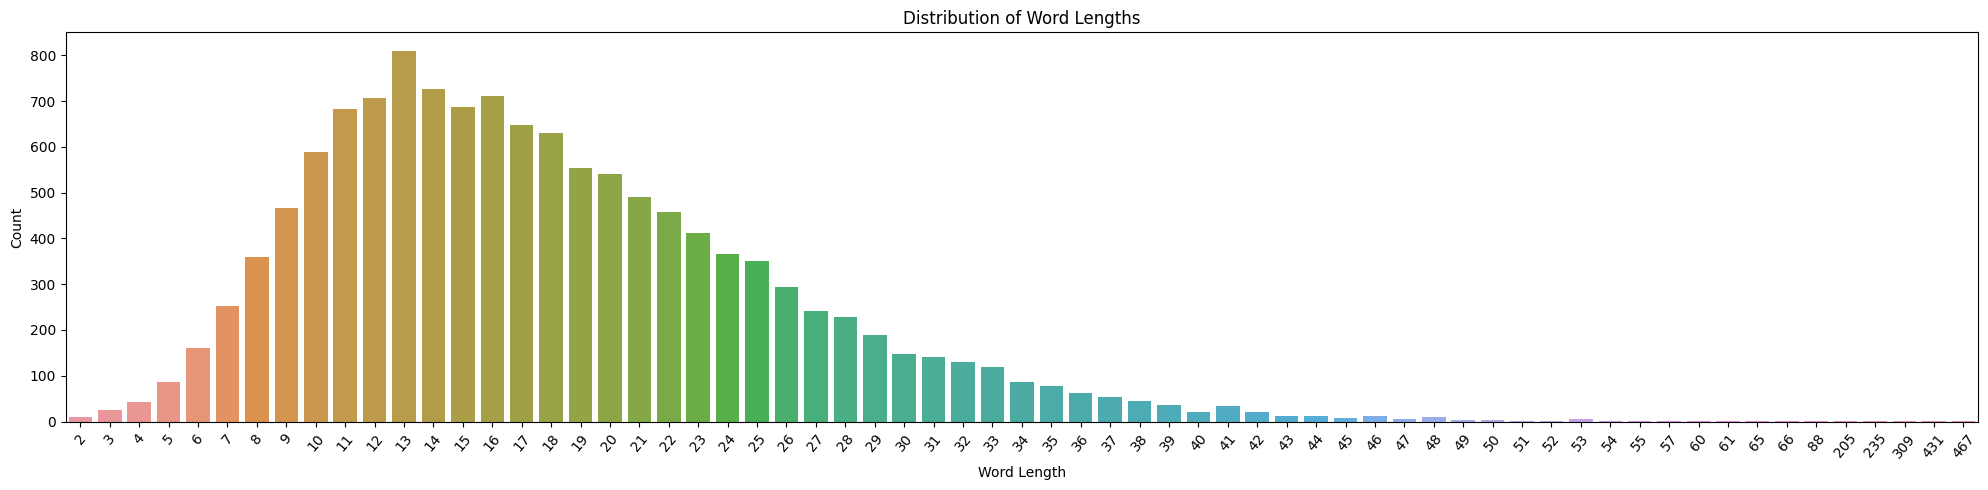

Length Ranges:
Minimum Character Length: 11
Maximum Character Length: 3192


In [ ]:
combined_statements = []    # Initialize an empty list to store all the statements
max_word_len = 0    # Initialize the maximum word length as 0
word_lengths = []    # Initialize an empty list to store the lengths of words
char_lengths = []    # Initialize an empty list to store the lengths of characters

# Iterate through each dataframe in liar_df
for df in liar_df:
    statements = df['Statement']    # Get the statements column from the dataframe
    combined_statements.extend(statements)    # Append the statements to the combined_statements list

    # Iterate through each statement
    for statement in statements:
        words = statement.split()    # Split the statement into words
        word_len = len(words)    # Get the length of words in the statement
        char_len = len(statement)    # Get the length of characters in the statement
        word_lengths.append(word_len)    # Append the word length to the word_lengths list
        char_lengths.append(char_len)    # Append the character length to the char_lengths list
        max_word_len = max(max_word_len, word_len)    # Update the maximum word length if necessary

print('Number of statements:', len(combined_statements))
print('Max length of words in the statements:', max_word_len)
print('Mean length of words in the statements:', np.mean(word_lengths))

# Plot a countplot of word lengths
plt.figure(figsize=(20, 5))
g = sns.countplot(x=word_lengths)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.title('Distribution of Word Lengths')
plt.tight_layout()
plt.show()

print("Length Ranges:")
print("Minimum Character Length:", min(char_lengths))
print("Maximum Character Length:", max(char_lengths))


#Formating Dataset

## Merging Labels into True or False

in this section

1.   merging labels into true or false
2.   checking to see if there are any missing values



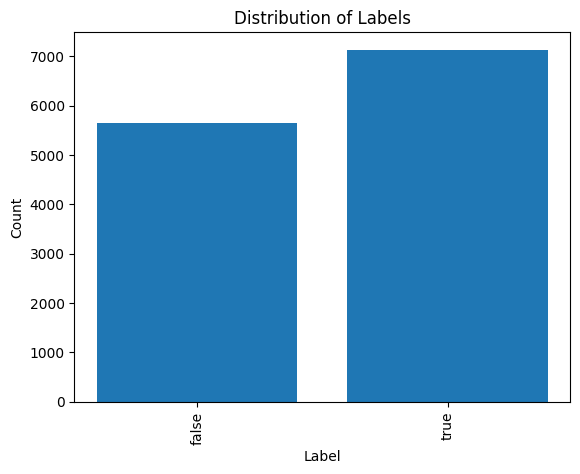

false    5655
true     7133
Name: Label, dtype: int64


In [ ]:
for df in liar_df:
    # Merge labels to 'true' or 'false'
    df['Label'] = df['Label'].map({'true': 'true', 'mostly-true': 'true', 'half-true': 'true',
                                   'barely-true': 'false', 'false': 'false', 'pants-fire': 'false'})

    # Create a new column 'Label_Value' with values 1 for true and 0 for false
    df['Label_Value'] = df['Label'].map({'true': 1, 'false': 0})

# Concatenate label counts from all dataframes
label_counts = pd.concat([df['Label'].value_counts() for df in liar_df])

# Group and sum the label counts
label_counts = label_counts.groupby(level=0).sum()

# Plot a bar chart
plt.bar(label_counts.index, label_counts.values)

# Set labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()

print(label_counts)



In [ ]:
# Iterate over each dataframe in liar_df
for df in liar_df:
    # Check for null values in the 'Label' column
    null_labels = df['Label'].isnull().sum()

    # Check for null values in the 'LabelValue' column
    null_label_values = df['Label_Value'].isnull().sum()

    # Print the number of null values in each column
    print("Number of null labels:", null_labels)
    print("Number of null label values:", null_label_values)
    print()


Number of null labels: 0
Number of null label values: 0

Number of null labels: 0
Number of null label values: 0

Number of null labels: 0
Number of null label values: 0



##Droping unnecessary columns

only the statement, label & label_value are kept

In [ ]:
updated_liar_df = []    # Initialize an empty list to store the updated dataframes

# Iterate through each dataframe in liar_df
for df in liar_df:
    updated_df = df[['Statement', 'Label', 'Label_Value']].copy()    # Create a new dataframe with selected columns
    updated_liar_df.append(updated_df)    # Append the updated dataframe to the updated_liar_df list

liar_df = tuple(updated_liar_df)    # Convert the updated_liar_df list to a tuple

liar_df[0].info()    # Display the information about the first dataframe in liar_df
print('')
liar_df[0].sample(n=3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Statement    10239 non-null  object
 1   Label        10239 non-null  object
 2   Label_Value  10239 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 240.1+ KB



,Statement,Label,Label_Value
5316,Says the number-one source of illegal immigrat...,false,0
8060,The tax policies of George W. Bush created a d...,false,0
6386,"Health insurance premiums ""have almost doubled...",true,1


##Saving Dataset



In [ ]:
new_folder = os.path.join(base_path, 'Liar collapsed labels')    # Create a new folder path

try:
    os.mkdir(new_folder)    # Create the new folder
except:
    print("already exist")    # Print a message if the folder already exists

# Save the selected columns from each dataframe in liar_df into separate CSV files within the new folder
data_handler.save_csv_data(liar_df[0][['Statement', 'Label', 'Label_Value']],
                           liar_df[1][['Statement', 'Label', 'Label_Value']],
                           liar_df[2][['Statement', 'Label', 'Label_Value']],
                           folder=new_folder)

print('Saved in ' + str(new_folder))    # Print a message indicating the successful saving of the files


Saved in /content/drive/MyDrive/Liar collapsed labels
